In [25]:
from google.colab import files
uploaded = files.upload()

Saving Credit_card_pred.csv to Credit_card_pred.csv


In [27]:
import pandas as pd
# Load the CSV file into a DataFrame
df = pd.read_csv("Credit_card_pred.csv")
# Show the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,predictions,Credit card number
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,False,6310836524182291
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,False,1722136511973606
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,True,7674734919115658
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,False,2269459669291351
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,False,2214839827445784


In [28]:
# Dataset shape
print("Shape of dataset:", df.shape)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Class distribution (how many fraud and non-fraud)
print("\nClass distribution:\n", df['Class'].value_counts())

# Percentage of fraud transactions
fraud_percentage = df['Class'].value_counts()[1] / len(df) * 100
print(f"\nFraud Percentage: {fraud_percentage:.4f}%")


Shape of dataset: (100, 33)

Missing values:
 Time                  0
V1                    0
V2                    0
V3                    0
V4                    0
V5                    0
V6                    0
V7                    0
V8                    0
V9                    0
V10                   0
V11                   0
V12                   0
V13                   0
V14                   0
V15                   0
V16                   0
V17                   0
V18                   0
V19                   0
V20                   0
V21                   0
V22                   0
V23                   0
V24                   0
V25                   0
V26                   0
V27                   0
V28                   0
Amount                0
Class                 0
predictions           0
Credit card number    0
dtype: int64

Class distribution:
 Class
0    89
1    11
Name: count, dtype: int64

Fraud Percentage: 11.0000%


In [29]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (80, 32)
Test set size: (20, 32)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=123)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Show confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
import joblib
joblib.dump(model, 'credit_model.pkl')



Confusion Matrix:
 [[15  0]
 [ 3  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.40      0.57         5

    accuracy                           0.85        20
   macro avg       0.92      0.70      0.74        20
weighted avg       0.88      0.85      0.82        20



['credit_model.pkl']

<ipython-input-37-9ea03fc5bc46>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='pastel')


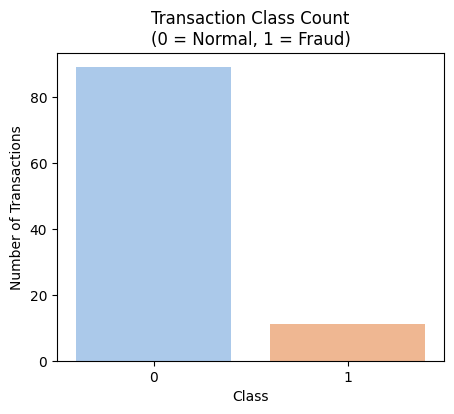

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df, palette='pastel')
plt.title('Transaction Class Count\n(0 = Normal, 1 = Fraud)')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

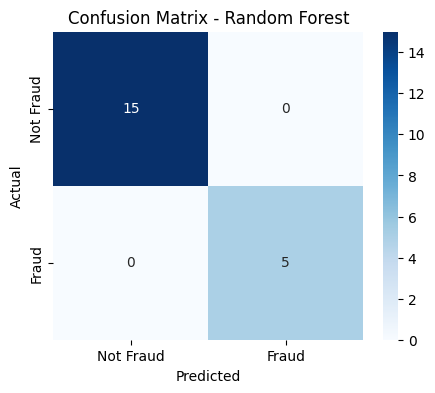

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
import pandas as pd
import joblib

# Load dataset and model
data = pd.read_csv('Credit_card_pred.csv')
model = joblib.load('credit_model.pkl')

# Get expected feature columns
expected_features = model.feature_names_in_

# Prediction function
def predict_transaction(input_features):
    input_df = pd.DataFrame([input_features], columns=expected_features)
    prediction = model.predict(input_df)
    return bool(prediction[0])

# Get transaction from card number
def get_transaction_by_card_number(card_number):
    row = data[data['Credit card number'].astype(str) == str(card_number)]
    if row.empty:
        print(f"Card number {card_number} not found.\n")
        return None
    features = row[expected_features]
    return features.values.flatten().tolist()

# Main: ask for 2 credit card numbers and print predictions
if __name__ == "__main__":
    for i in range(2):
        card_number = input(f"Enter Credit Card Number {i+1}: ")
        transaction = get_transaction_by_card_number(card_number)
        if transaction:
            result = predict_transaction(transaction)
            print(f"\nCredit Card Number: {card_number}\n{result}\n")


Enter Credit Card Number 1: 6310836524182291

Credit Card Number: 6310836524182291
False

Enter Credit Card Number 2: 7674734919115658

Credit Card Number: 7674734919115658
True

